In [1]:
import qiskit as q
%matplotlib inline



In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [3]:
#USE HAMMING DISTANCE

In [4]:
#Hamming distance is defined as counting the number of which the corresponding symbols of a two bit vectors of equal length are different e.g

#Hamming Distance:( 0110  0001) has a distance of 2
#Hamming Distance:( 0110  1110) has a distance of 3


In [5]:
#metric used for measuring similarity. It’s just a traditional XOR 

In [6]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

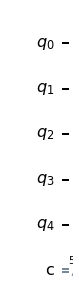

In [7]:
#different illustraitve options
circuit.draw() # will give an ascii representation of the circuit
circuit.draw(output="mpl")

In [8]:
#STEP 2). Unclassified quantum state in the first register, training set |T⟩ in the second register, ancillary qubit in the last register.

In [9]:
circuit.h(qreg_q[0]) #The H, or Hadamard, gate rotates the states  and  to  and , respectively.
circuit.h(qreg_q[1])#It is useful for making superpositions. If you have a universal gate set on a classical computer and add the Hadamard gate, 
#it becomes a universal gate set on a quantum computer.


In [10]:
#ancillary qubit in the last register. --> make use of the identity gate which is actually the absence of a gate. 
#It ensures that nothing is applied to a qubit for one unit of gate time.

In [11]:
circuit.id(qreg_q[4])

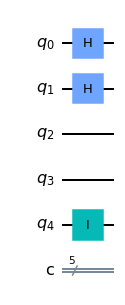

In [12]:


circuit.draw(output="mpl")

In [13]:
#STEP 3). Apply a CNOT --> the result of q2,q3, minus each of the elements of the superposition 

In [14]:
circuit.x(qreg_q[3])#The NOT gate, also known as the Pauli X gate, flips the  state to , and vice versa. 
circuit.cx(qreg_q[1], qreg_q[3])#CNOT gate (ontrolled NOT)
# acts on a pair of qubits, with one acting as ‘control’ and the other as ‘target’. It performs a NOT on the target whenever the control is in state |1>
# If the control qubit is in a superposition, this gate creates entanglement.
circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├──■──
     └───┘  │  
q_2: ───────┼──
     ┌───┐┌─┴─┐
q_3: ┤ X ├┤ X ├
     ├───┤└───┘
q_4: ┤ I ├─────
     └───┘     
c: 5/══════════

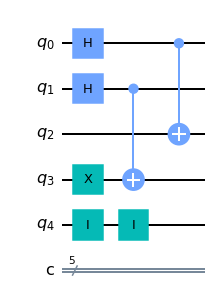

In [15]:
circuit.id(qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.draw(output="mpl")


In [16]:
circuit.id(qreg_q[3])
circuit.id(qreg_q[4])
circuit.id(qreg_q[0])
circuit.id(qreg_q[1])
circuit.draw()

┌───┐          ┌───┐
q_0: ┤ H ├───────■──┤ I ├
     ├───┤       │  ├───┤
q_1: ┤ H ├──■────┼──┤ I ├
     └───┘  │  ┌─┴─┐└───┘
q_2: ───────┼──┤ X ├─────
     ┌───┐┌─┴─┐├───┤     
q_3: ┤ X ├┤ X ├┤ I ├─────
     ├───┤├───┤├───┤     
q_4: ┤ I ├┤ I ├┤ I ├─────
     └───┘└───┘└───┘     
c: 5/════════════════════

In [17]:
circuit.x(qreg_q[2])
circuit.x(qreg_q[3])
circuit.id(qreg_q[4])

circuit.draw()

┌───┐          ┌───┐
q_0: ┤ H ├───────■──┤ I ├
     ├───┤       │  ├───┤
q_1: ┤ H ├──■────┼──┤ I ├
     └───┘  │  ┌─┴─┐├───┤
q_2: ───────┼──┤ X ├┤ X ├
     ┌───┐┌─┴─┐├───┤├───┤
q_3: ┤ X ├┤ X ├┤ I ├┤ X ├
     ├───┤├───┤├───┤├───┤
q_4: ┤ I ├┤ I ├┤ I ├┤ I ├
     └───┘└───┘└───┘└───┘
c: 5/════════════════════

In [18]:
#STEP 4) Compute Hamming distance {TBD}

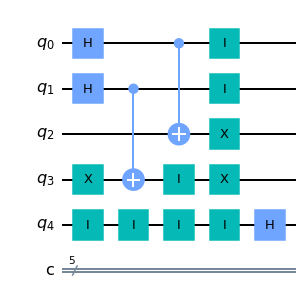

In [19]:
circuit.h(qreg_q[4])
circuit.draw(output="mpl")

In [20]:
#Notes --> rough work

In [21]:
#Once the addition is done, select the most significant qubit and use the quantum OR gate to get the signal COND^p,
#which indicates the condition of Hamming distance <=t

In [22]:
#We want to select the ones that have a hamming distance lower than a certain t  [we have them in superposition]

In [23]:
#So for 00001, the two lowest  ‘01’ encode one the elements of the training set. 
#The following two ( reading from right to left), encode the result of subtracting the input e,g ‘10’, against that element of the training set

In [24]:
#Now the filter will say that we want only the ones below a certain threshold in terms of their hamming distance.
#Proposed way to do this is to add a constant , some a, so if they overflow then the hamming distance is there.
